In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-28 00:26:49.429619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 00:26:49.433717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 00:26:49.442074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745789209.458469  108154 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745789209.461990  108154 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745789209.472586  108154 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2025-04-28 00:26:54.577370: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1086 - loss: 2.2267   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1138 - loss: 2.2186 - val_accuracy: 0.2824 - val_loss: 2.0589
Epoch 2/1000
30/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2271 - loss: 2.0583 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2305 - loss: 2.0524 - val_accuracy: 0.2992 - val_loss: 1.9404
Epoch 3/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2820 - loss: 1.9422 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2811 - loss: 1.9379 - val_accuracy: 0.3296 - val_loss: 1.8201
Epoch 4/1000
19/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3053 - loss: 1.8324 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8979 - loss: 0.4560 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[1.6171224e-01 4.1490264e-02 6.3362852e-05 7.8904343e-01 4.6026394e-10
 2.7299975e-04 2.1549457e-08 7.4176909e-03 3.5452132e-09]
3


# 混同行列

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


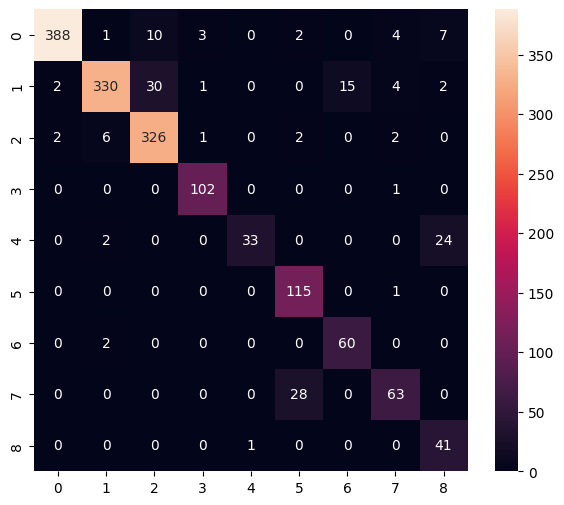

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       415
           1       0.97      0.86      0.91       384
           2       0.89      0.96      0.92       339
           3       0.95      0.99      0.97       103
           4       0.97      0.56      0.71        59
           5       0.78      0.99      0.87       116
           6       0.80      0.97      0.88        62
           7       0.84      0.69      0.76        91
           8       0.55      0.98      0.71        42

    accuracy                           0.91      1611
   macro avg       0.86      0.88      0.85      1611
weighted avg       0.92      0.91      0.91      1611



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpc9266n69/assets


INFO:tensorflow:Assets written to: /tmp/tmpc9266n69/assets


Saved artifact at '/tmp/tmpc9266n69'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  131171134455632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131171134444112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131171060172752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131171060177744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131171060171024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131171060184848: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1745789237.457077  108154 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745789237.457136  108154 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-28 00:27:17.457739: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpc9266n69
2025-04-28 00:27:17.458584: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-28 00:27:17.458609: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpc9266n69
I0000 00:00:1745789237.462906  108154 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-28 00:27:17.463718: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-28 00:27:17.492259: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpc9266n69
2025-04-28 00:27:17.500012: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

6776

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/home/denis/m/hand-gesture-env/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 596 μs, sys: 81 μs, total: 677 μs
Wall time: 1.83 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6171230e-01 4.1490231e-02 6.3362852e-05 7.8904343e-01 4.6026388e-10
 2.7299987e-04 2.1549498e-08 7.4176937e-03 3.5452130e-09]
3
